### 라이브러리 임포트

In [29]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

### CSV 파일 불러오기

In [30]:
file_path = r"C:\Users\MinGi\Desktop\year3-sem1\인공지능개론\dataset\heart.csv"
df = pd.read_csv(file_path)

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


### 레이블 개수 확인

In [31]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### 결측치 확인

In [32]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### 입력/정답 나누기 및 전처리

In [33]:
x = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
x = scaler.fit_transform(x)

### 원-핫 인코딩

In [35]:
Y = pd.get_dummies(y).values
Y

array([[False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [Fal

### 훈련/테스트 나누기

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, Y,test_size=0.25,random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(227, 13) (227, 2)
(76, 13) (76, 2)


### 모델 정의

In [14]:
model = Sequential()

model.add(Dense(10,input_shape=(13,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\MinGi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃                 ┃ Output      ┃  Param ┃
┃ Layer (type)    ┃ Shape       ┃      # ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ dense (Dense)   │ (None, 10)  │    140 │
├─────────────────┼─────────────┼────────┤
│ dense_1 (Dense) │ (None, 8)   │     88 │
├─────────────────┼─────────────┼────────┤
│ dense_2 (Dense) │ (None, 6)   │     54 │
├─────────────────┼─────────────┼────────┤
│ dense_3 (Dense) │ (None, 2)   │     14 │
└─────────────────┴─────────────┴────────┘

 Total params: 296 (1.16 KB)

 Trainable params: 296 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

### 모델 학습 및 예측

In [24]:
model_history=model.fit(x=x_train, y=y_train, epochs=13, batch_size=32,validation_split=0.1) # train의 10%를 validation으로 설정. 검증에 사용
y_pred = model.predict(x_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9424 - loss: 0.1658 - val_accuracy: 0.8261 - val_loss: 0.4577
Epoch 2/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9340 - loss: 0.1763 - val_accuracy: 0.7826 - val_loss: 0.5265
Epoch 3/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9629 - loss: 0.1175 - val_accuracy: 0.8261 - val_loss: 0.6291
Epoch 4/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9579 - loss: 0.1244 - val_accuracy: 0.6957 - val_loss: 1.0131
Epoch 5/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9468 - loss: 0.1456 - val_accuracy: 0.7826 - val_loss: 0.7532
Epoch 6/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9871 - loss: 0.0821 - val_accuracy: 0.7826 - val_loss: 0.7286
Epoch 7/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9612 - loss: 0.1168 - val_accuracy: 0.7826 - val_loss: 0.7438
Epoch 8/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9569 - loss: 0.1282 - val_accuracy: 0.7391 - val_loss: 0.8119


### 손실 시각화

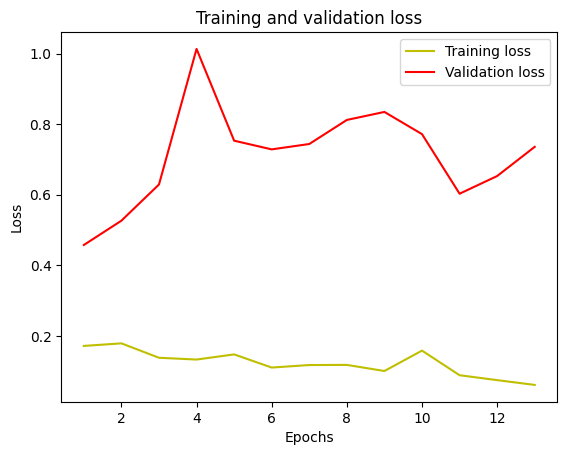

In [25]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 정확도 시각화

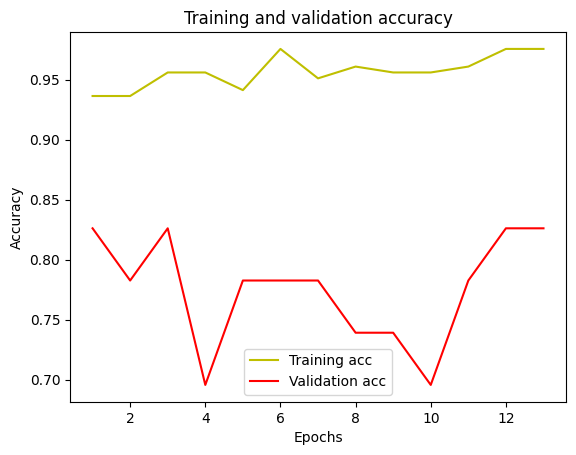

In [26]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 정확도 확인

In [27]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        33
           1       0.81      0.81      0.81        43

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76

[[25  8]
 [ 8 35]]
